In [1]:
# Import the data of the scenario 1 and the optimization function (netopt)
# Press shift + enter in each cell to run the commands, or click on Run in the command bar
# v1.1 - 2022-03-19

from netopt import netopt, print_solution, plot_map
from data.scenario_1 import warehouses, customers, distance

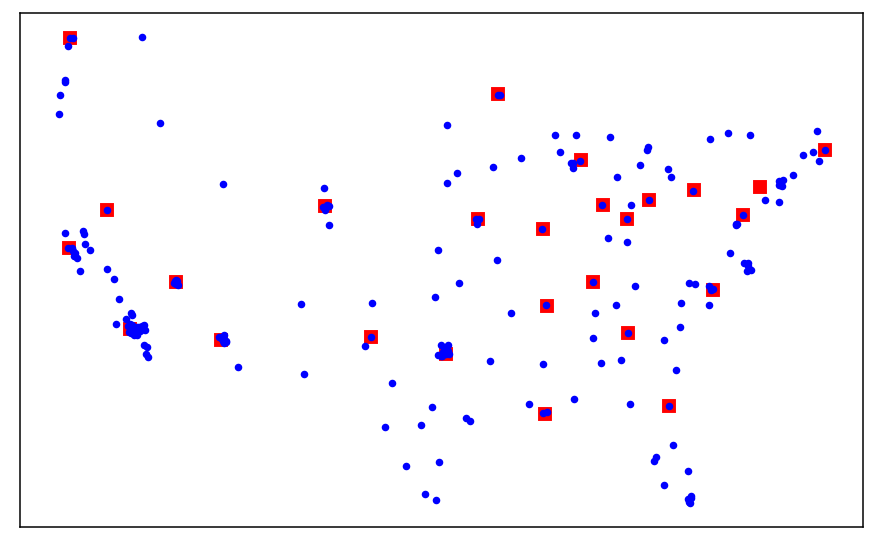

In [2]:
# Plot the data
# You can control the colors and shapes in the plot using the following parameters (also in the netopt function):
# - warehouse_marker=shape of the warehouse icons. Allowed values are s=square, o=circle, *=star, ^=triangle, v=inverted triangle. Default is s
# - warehouse_markercolor=color of the warehouse icons. Allowed values are red, green, blue, black, yellow. Default is red
# - warehouse_markersize=size of the warehouse icons. Default is 4
# - warehouse_active_markersize=size of the warehouse icons representing active (open) warehouses. Default is 5
# - customer_marker=shape of the customer icons. Default is o
# - customer_markercolor=color of the customer icons. Default is blue
# - customer_markersize=size of the customer icons. Default is 4
# If you don't specify the above parameters about the figures, the default values will be assumed

plot_map(customers=customers,
         warehouses=warehouses,
         warehouse_marker='s',
         warehouse_markercolor='red',
         warehouse_markersize=6,
         customer_marker='o',
         customer_markercolor='blue',
         customer_markersize=3)

In [ ]:
customers

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 383.0

Open warehouses:
ID:   8 City: Dallas               State: TX     Num. customers:  58  Outflow:  20385874.0 units
ID:   3 City: Baltimore            State: MD     Num. customers:  74  Outflow:  33753054.0 units
ID:  14 City: Los Angeles          State: CA     Num. customers:  68  Outflow:  23887405.0 units

Total outflow: 78026333.0 units
% of demand in range     0 - 99999: 100.0
Most distant customer is at 1139
Average customers distance (no weights): 428.36


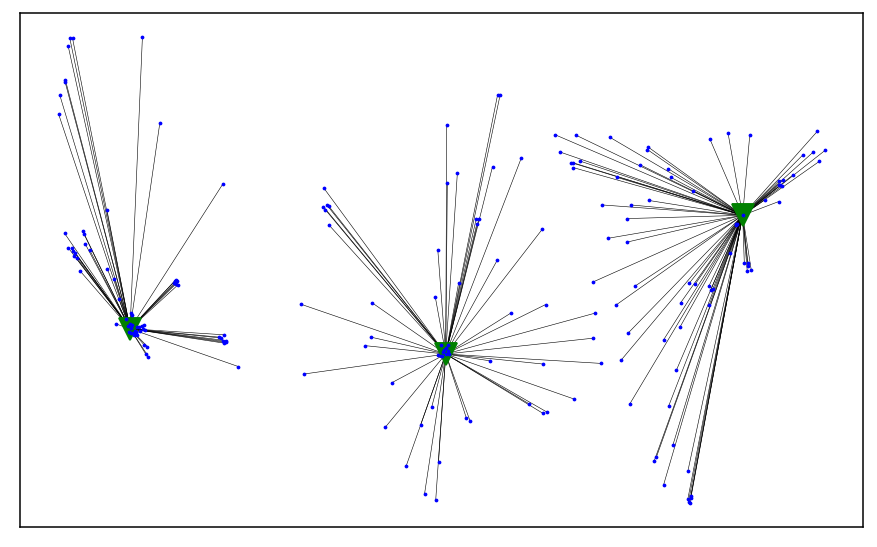

In [3]:
# Get the optmimal location of num_warehouses warehouses.
# You can change the value of parameter num_warehouses to test different scenario.
# The parameter warehouses, customers, and distance are loaded in the previous cell.
# You must define the objective: the objective mindistance minimizes the average weighted distance.
# By setting the parameter plot to True, the function returns a simplyfied picture of the solution along with a summary of the performance. 
# If you don't want the picture, set plot to False.
# If you set hide_inactive to True the plot would not show inactive warehouses.
# Outflow in the results represents the quantity exiting from each warehouse.


results = netopt(num_warehouses=3,
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 plot=True,
                 hide_inactive=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 383.0

Open warehouses:
ID:   8 City: Dallas               State: TX     Num. customers:  58  Outflow:  20385874.0 units
ID:   3 City: Baltimore            State: MD     Num. customers:  74  Outflow:  33753054.0 units
ID:  14 City: Los Angeles          State: CA     Num. customers:  68  Outflow:  23887405.0 units

Total outflow: 78026333.0 units
% of demand in range     0 -   100: 18.1
% of demand in range   100 -   400: 37.8
% of demand in range   400 -   800: 35.1
% of demand in range   800 -  3200: 8.9
% of demand in range  3200 - 99999: 0.0
Most distant customer is at 1139
Average customers distance (no weights): 428.36


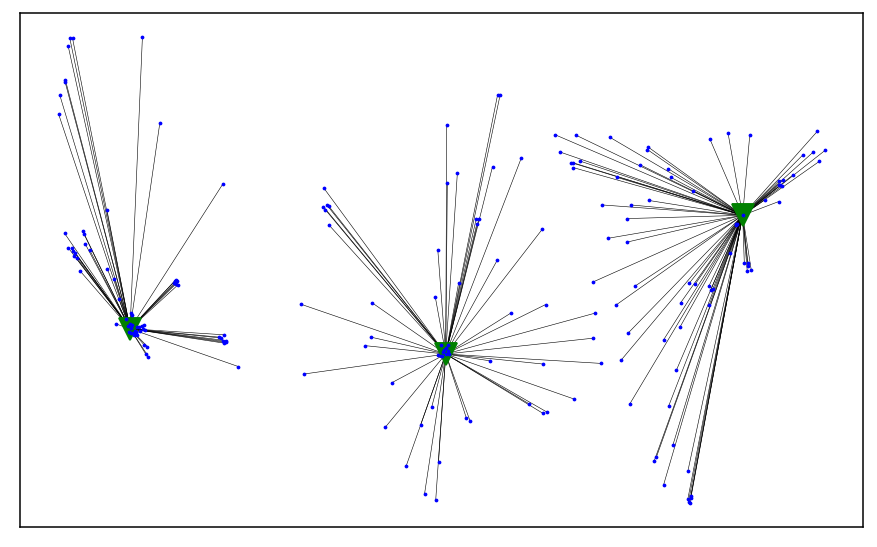

In [4]:
# By adding the parameter distance_ranges the functions returns the % of the demand
# within the passed distance ranges. For example, if distance_ranges = [0, 100, 200]
# the functions return the percentage of demand in the ranges [0, 100], (100, 200], (200, 99999]
# where 99999 is used to represent a very long distance (i.e. infinite distance).
# By changing the parameter num_warehouses and distance_ranges you can test different scenarios.
# The parameter distance_ranges must be a list of increasing numbers. If you do not pass 0 as the first value
# it will be automatically added

results = netopt(num_warehouses=3,
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 distance_ranges=[0, 100, 400, 800, 3200],
                 plot=True,
                 hide_inactive=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

In [ ]:
# The results variable contains a summary of the optimization report

print(results)

In [ ]:
# For a slightly better visualization of the results use print_solution as follows

print_solution(results)

In [ ]:
# It is also possible to force warehouses to be open (for example, to force using the current warehouse)
# of closed (to avoid the selection of some candidate).
# The warehouses are references through their id, and must be passed as list [] (even for a single value, that is
# to force closed the warehouse with id 1 you should pass force_closed=[1])


results = netopt(num_warehouses=3,
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 force_open=[1],
                 force_closed=[8, 3],
                 distance_ranges=[0, 100, 400, 800, 3200],
                 plot=True,
                 hide_inactive=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

In [ ]:
# The id of the warehouses is the value on the left of the colon in the warehouses python variable

print_solution(warehouses)

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
% covered demand within 800 distance: 96.2%

Open warehouses:
ID:  26 City: Lubbock              State: TX     Num. customers:  63  Outflow:  21378807.0 units
ID:  22 City: Reno                 State: NV     Num. customers:  62  Outflow:  22156342.0 units
ID:   7 City: Columbus             State: OH     Num. customers:  75  Outflow:  34491184.0 units

Total outflow: 78026333.0 units
% of demand in range     0 -   100: 2.1
% of demand in range   100 -   400: 30.9
% of demand in range   400 -   800: 63.2
% of demand in range   800 -  3200: 3.8
% of demand in range  3200 - 99999: 0.0
Most distant customer is at 1654
Average customers distance (no weights): 513.235


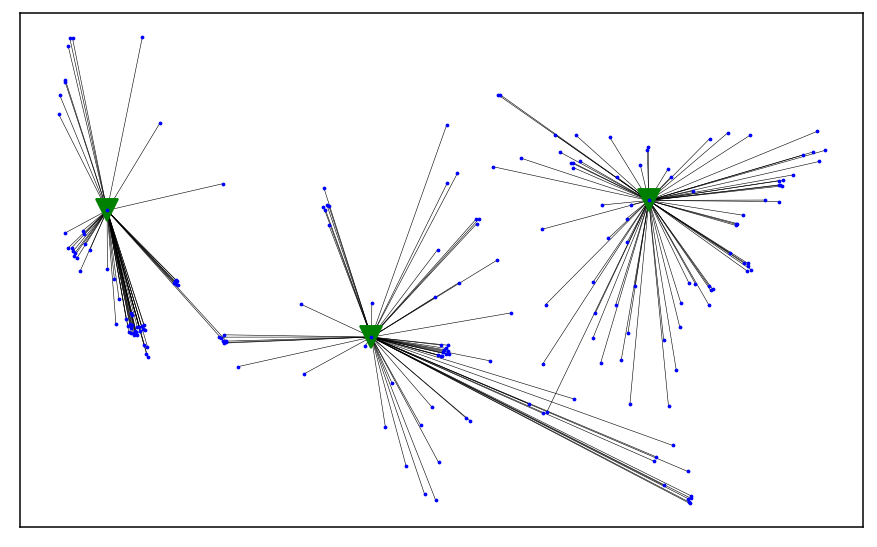

In [5]:
# The objective maxcover maximises the % of demand within a distance specified
# by the high_service_distance parameter. If you set the objective to maxcover and don't specify the
# high_service_distance parameter you'll get an error.

results = netopt(num_warehouses=3,
                 objective='maxcover',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 high_service_distance=800,
                 distance_ranges=[0, 100, 400, 800, 3200],
                 force_open=[],
                 force_closed=[],
                 plot=True,
                 hide_inactive=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

#print_solution(results)


CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
% covered demand within 800 distance: 96.2%

Open warehouses:
ID:  26 City: Lubbock              State: TX     Num. customers:  51  Outflow:  20208166.0 units
ID:  22 City: Reno                 State: NV     Num. customers:  62  Outflow:  20486224.0 units
ID:   7 City: Columbus             State: OH     Num. customers:  87  Outflow:  37331943.0 units

Total outflow: 78026333.0 units
% of demand in range     0 -   100: 2.1
% of demand in range   100 -   400: 30.9
% of demand in range   400 -   800: 63.2
% of demand in range   800 -  3200: 3.8
% of demand in range  3200 - 99999: 0.0
Most distant customer is at 1505
Average customers distance (no weights): 491.35


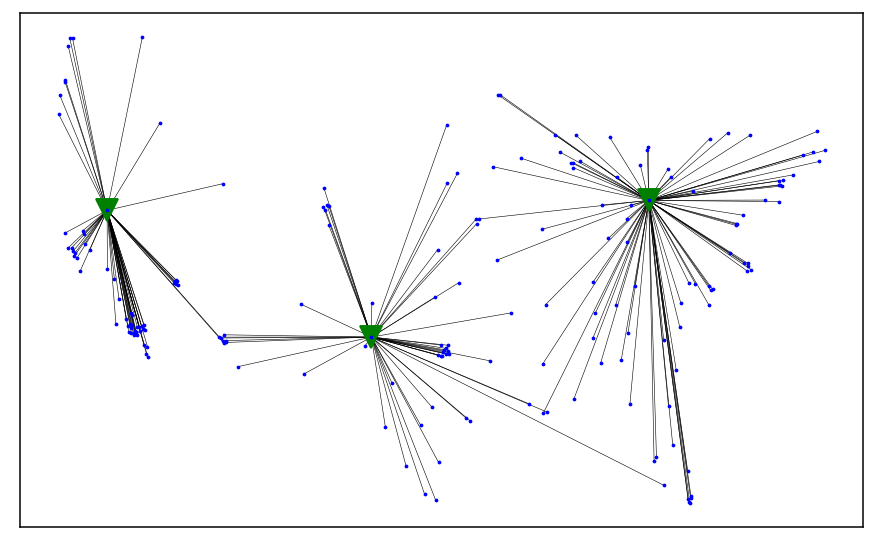

In [6]:
# To limit the effect of random allocations of customers not contributing to the maxcover objective
# you can set the avg_service_distance in order to limit the avg weighted distance.
# Be careful: if avg_service_distance is too tight, it may results in a worse % of covered demand

results = netopt(num_warehouses=3,
                 objective='maxcover',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 high_service_distance=800,
                 avg_service_distance=500,
                 distance_ranges=[0, 100, 400, 800, 3200],
                 force_open=[],
                 force_closed=[],
                 plot=True,
                 hide_inactive=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

#print_solution(results)


CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Infeasible
********* ERROR: Model not feasible, don't use results.
% covered demand within 800 distance: 81.8%

Open warehouses:
ID:  17 City: Nashville            State: TN     Num. customers:  92  Outflow:  38867786.0 units
ID:  26 City: Lubbock              State: TX     Num. customers:  41  Outflow:  16901137.0 units
ID:  22 City: Reno                 State: NV     Num. customers:  62  Outflow:  20776221.0 units

Total outflow: 76545144.0 units
% of demand in range     0 -   100: 1.7
% of demand in range   100 -   400: 22.9
% of demand in range   400 -   800: 57.2
% of demand in range   800 -  3200: 18.2
% of demand in range  3200 - 99999: 0.0
Most distant customer is at 969
Average customers distance (no weights): 506.95


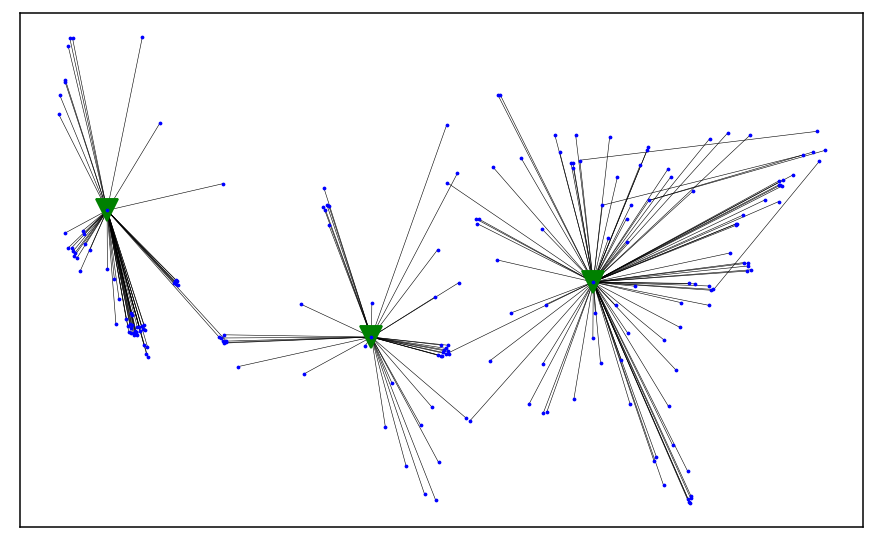

{   'active_warehouses_id': {17, 26, 22},
    'active_warehouses_name': ['Nashville', 'Lubbock - Current WH', 'Reno'],
    'avg_customer_distance': 506.95,
    'avg_weighted_distance': 541.7586852505294,
    'customers_assignment': [   {   'Customer': 'Concord',
                                    'Customer Demand': 375134,
                                    'Customer_id': 77,
                                    'Customers Latitude': 43.2347496666667,
                                    'Customers Longitude': -71.5435606666667,
                                    'Distance': 969,
                                    'Warehouse': 'Chicago',
                                    'Warehouse Latitude': 41.88331,
                                    'Warehouse Longitude': -87.624713,
                                    'Warehouse_id': 5},
                                {   'Customer': 'Boston',
                                    'Customer Demand': 610407,
                                    

                                    'Warehouse_id': 17},
                                {   'Customer': 'Philadelphia',
                                    'Customer Demand': 1445993,
                                    'Customer_id': 140,
                                    'Customers Latitude': 40.01,
                                    'Customers Longitude': -75.13,
                                    'Distance': 808,
                                    'Warehouse': 'Nashville',
                                    'Warehouse Latitude': 36.164003,
                                    'Warehouse Longitude': -86.7745,
                                    'Warehouse_id': 17},
                                {   'Customer': 'Pittsburgh',
                                    'Customer Demand': 305708,
                                    'Customer_id': 142,
                                    'Customers Latitude': 40.44,
                                    'Customers Longitude': -79.98,
    

                                    'Customer Demand': 212144,
                                    'Customer_id': 178,
                                    'Customers Latitude': 36.11,
                                    'Customers Longitude': -115.24,
                                    'Distance': 404,
                                    'Warehouse': 'Reno',
                                    'Warehouse Latitude': 39.526866,
                                    'Warehouse Longitude': -119.811392,
                                    'Warehouse_id': 22},
                                {   'Customer': 'Stockton',
                                    'Customer Demand': 291422,
                                    'Customer_id': 179,
                                    'Customers Latitude': 37.97,
                                    'Customers Longitude': -121.31,
                                    'Distance': 158,
                                    'Warehouse': 'Reno',
                  

In [11]:
# To limit the distance of the most distant customer, you can use the paramater max_service_distance.
# Be careful: if max_service_distance is too tight, the model may become infeasible.

results = netopt(num_warehouses=3,
                 objective='maxcover',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 high_service_distance=800,  # R
                 avg_service_distance=1200,  # awd
                 max_service_distance=1017,  # B = maxdist
                 distance_ranges=[0, 100, 400, 800, 3200],
                 force_open=[],
                 force_closed=[],
                 plot=True,
                 hide_inactive=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

print_solution(results)

In [ ]:
# Feel free to play with the parameters. If you find any error, please report it to me.

In [ ]:
# If you know a little bit of python (or you are willing to learn a little bit), 
# you can easily automate experiments.
# For example, compute the average weighted distance for several values of p

for p in [1, 2, 3, 4, 5]:
    results = netopt(num_warehouses=p,
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 force_open=[],
                 force_closed=[],
                 plot=False)
    print()
    print(f"*** AVG WEIGHTED DISTANCE FOR p={p}: {results['avg_weighted_distance']} ***")
    print()

In [ ]:
# You can collect data from different experiments and the plot it

data = {}
for p in [1, 2, 3, 4, 5]:
    results = netopt(num_warehouses=p,
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 force_open=[],
                 plot=False)
    data[p] = results['avg_weighted_distance']
    
# Plot the results
import matplotlib.pyplot as plt
plt.plot(data.keys(), data.values())